In [2]:
import addutils.toc ; addutils.toc.js(ipy_notebook=True)

In [3]:
%load_ext load_style
%load_style talk.css
from IPython.display import Image, HTML
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The load_style extension is already loaded. To reload it, use:
  %reload_ext load_style


# Pandas

**pandas** is a Python package providing fast, flexible, and expressive data structures designed to work with *relational* or *labeled* data. It is a fundamental high-level building block for doing practical, real world data analysis in Python. 

pandas is well suited for:

- Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
- Ordered and unordered (not necessarily fixed-frequency) time series data.
- Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
- Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure


Key features:  
    
- Easy handling of **missing data**
- **Size mutability**: columns can be inserted and deleted from DataFrame and higher dimensional objects
- Automatic and explicit **data alignment**: objects can be explicitly aligned to a set of labels, or the data can be aligned automatically
- Powerful, flexible **group by functionality** to perform split-apply-combine operations on data sets
- Intelligent label-based **slicing, fancy indexing, and subsetting** of large data sets
- Intuitive **merging and joining** data sets
- Flexible **reshaping and pivoting** of data sets
- **Hierarchical labeling** of axes
- Robust **IO tools** for loading data from flat files, Excel files, databases, and HDF5
- **Time series functionality**: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc.

In [4]:
HTML('<iframe src=http://pandas.pydata.org/index.html width=900 height=350></iframe>')

The conventional way to import pandas is ```import pandas as pd```

In [5]:
import pandas as pd

some options setting 

In [4]:
pd.set_option("display.width", 80)
# toggle the line below that if one doesnt want DataFrames displayed as HTML tables
#pd.set_option("notebook_repr_html", False) 
pd.set_option("notebook_repr_html", True) 

Pandas's data structures and functionalities will be familiar to R users, there's a section on Pandas's website where 
Wes McKinney gives some translation of common idioms / operations between R and Pandas 

In [5]:
HTML('<iframe src=http://pandas.pydata.org/pandas-docs/stable/comparison_with_r.html#compare-with-r width=900 height=350></iframe>')

## Pandas data structures

### Series


A **Series** is a single vector of data values (think a NumPy array with shape N or (N,1)) with an **index** that labels each element in the vector.

#### Series constructions

In [6]:
a = pd.Series(np.random.normal(0,1,(10,)))

In [7]:
a

0   -1.398521
1   -0.863246
2   -0.226279
3   -1.040044
4    0.377937
5   -1.562212
6   -0.987568
7   -1.606816
8   -1.466501
9   -0.941381
dtype: float64

In [8]:
a.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [9]:
a.values

array([-1.39852099, -0.86324599, -0.22627861, -1.04004355,  0.37793712,
       -1.56221212, -0.98756817, -1.60681631, -1.46650075, -0.94138079])

#### You can define your own **index**

In [10]:
a = pd.Series(np.random.normal(0,1,(10,)), index=np.arange(1,11))

In [11]:
a

1    -1.262935
2    -0.669490
3     1.043141
4    -0.102828
5    -0.821477
6     0.572384
7    -0.621883
8    -1.911649
9     0.446867
10   -0.044686
dtype: float64

In [12]:
a = pd.Series(np.random.normal(0,1,5), \
              index=['a','b','c','d','e'], name='my series')

In [13]:
a

a   -0.227054
b    0.904130
c    1.135842
d   -0.422937
e   -1.417380
Name: my series, dtype: float64

Pandas objects expose some powerful, **high level plotting functions** (built on top of Matplotlib)

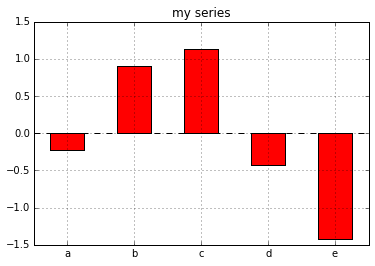

In [14]:
plot = a.plot(kind='bar', rot=0, color='r', title=a.name)

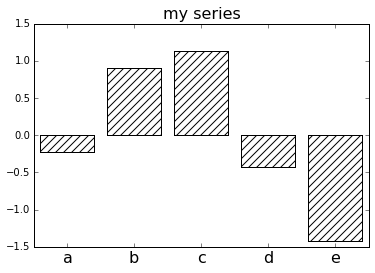

In [15]:
f, ax = plt.subplots()
bars = ax.bar(np.arange(len(a)), a.values, color='w', edgecolor='k', align='center', hatch='///')
ax.set_xticks(np.arange(len(a)))
ax.set_xlim(-0.5, len(a)-0.5)
ax.set_xticklabels(a.index, fontsize=16)
ax.set_title(a.name, fontsize=16)

#### Series indexing

Selecting from a Series is easy, using the corresponding index key (like a dict)

In [16]:
a

a   -0.227054
b    0.904130
c    1.135842
d   -0.422937
e   -1.417380
Name: my series, dtype: float64

In [17]:
a['c']

1.1358419942296485

slices are permitted 

In [18]:
a['a':'c'] ### Note the difference with standard Python / Numpy positional, integer indexing

a   -0.227054
b    0.904130
c    1.135842
Name: my series, dtype: float64

In [19]:
a['c':]

c    1.135842
d   -0.422937
e   -1.417380
Name: my series, dtype: float64

deleting an element 

In [20]:
a.drop('d')

a   -0.227054
b    0.904130
c    1.135842
e   -1.417380
Name: my series, dtype: float64

Adding an element is (to my knowledge) not straightforward

In [21]:
a = a.drop('d')

In [22]:
a

a   -0.227054
b    0.904130
c    1.135842
e   -1.417380
Name: my series, dtype: float64

In [23]:
a.append(pd.Series({'d':5}))

a   -0.227054
b    0.904130
c    1.135842
e   -1.417380
d    5.000000
dtype: float64

Mathematical operations involving two series will perform operations by *aligning indices*.

1. The union of all indices is created
2. The mathematical operation is performed on matching indices. 

Indices that do not match are given the value NaN (not a number), and values are computed for all unique pairs of repeated indices.

In [24]:
s1 = pd.Series(np.arange(1.0,4.0),index=['a','b','c'])
s2 = pd.Series(np.arange(1.0,4.0),index=['b','c','d'])

In [25]:
s3 = s1 + s2

In [26]:
s3

a   NaN
b     3
c     5
d   NaN
dtype: float64

NaNs are ignored in all operations 

In [27]:
s3.mean()

4.0

You can drop them from the Series

In [28]:
s4 = s3.dropna()

In [29]:
s4

b    3
c    5
dtype: float64

Or use the `fillna` method to replace them by a value

In [30]:
s3.fillna(-999)

a   -999
b      3
c      5
d   -999
dtype: float64

In [31]:
s3.fillna(s3.mean())

a    4
b    3
c    5
d    4
dtype: float64

#### Series with a date / datetime index (timeseries)

Series can have indexes representing dates / times 

In [32]:
a

a   -0.227054
b    0.904130
c    1.135842
e   -1.417380
Name: my series, dtype: float64

In [33]:
a.index = pd.date_range(start='2014-1-1', periods=len(a)) # default 'period' is daily

In [34]:
a.head()

2014-01-01   -0.227054
2014-01-02    0.904130
2014-01-03    1.135842
2014-01-04   -1.417380
Freq: D, Name: my series, dtype: float64

In [35]:
a.index

<class 'pandas.tseries.index.DatetimeIndex'>
[2014-01-01, ..., 2014-01-04]
Length: 4, Freq: D, Timezone: None

In [36]:
### but you can convert it to an numpy array of python datetime objects if you want
py_datetimes = a.index.to_pydatetime()

And a number of useful methods for manipulation of time series is exposed

In [37]:
### resample daily time-series to 5 minutes 'period', using forward filling method
a.resample('5min',fill_method='ffill')

2014-01-01 00:00:00   -0.227054
2014-01-01 00:05:00   -0.227054
2014-01-01 00:10:00   -0.227054
2014-01-01 00:15:00   -0.227054
2014-01-01 00:20:00   -0.227054
2014-01-01 00:25:00   -0.227054
2014-01-01 00:30:00   -0.227054
2014-01-01 00:35:00   -0.227054
2014-01-01 00:40:00   -0.227054
2014-01-01 00:45:00   -0.227054
2014-01-01 00:50:00   -0.227054
2014-01-01 00:55:00   -0.227054
2014-01-01 01:00:00   -0.227054
2014-01-01 01:05:00   -0.227054
2014-01-01 01:10:00   -0.227054
...
2014-01-03 22:50:00    1.135842
2014-01-03 22:55:00    1.135842
2014-01-03 23:00:00    1.135842
2014-01-03 23:05:00    1.135842
2014-01-03 23:10:00    1.135842
2014-01-03 23:15:00    1.135842
2014-01-03 23:20:00    1.135842
2014-01-03 23:25:00    1.135842
2014-01-03 23:30:00    1.135842
2014-01-03 23:35:00    1.135842
2014-01-03 23:40:00    1.135842
2014-01-03 23:45:00    1.135842
2014-01-03 23:50:00    1.135842
2014-01-03 23:55:00    1.135842
2014-01-04 00:00:00   -1.417380
Freq: 5T, Name: my series, Length: 8

In [38]:
a

2014-01-01   -0.227054
2014-01-02    0.904130
2014-01-03    1.135842
2014-01-04   -1.417380
Freq: D, Name: my series, dtype: float64

In [39]:
### the ```shift``` method makes it easy e.g. to compare series with lead / lags 
a.shift(periods=-1)

2014-01-01    0.904130
2014-01-02    1.135842
2014-01-03   -1.417380
2014-01-04         NaN
Freq: D, Name: my series, dtype: float64

In [40]:
a

2014-01-01   -0.227054
2014-01-02    0.904130
2014-01-03    1.135842
2014-01-04   -1.417380
Freq: D, Name: my series, dtype: float64

In [41]:
### and the ```truncate`` method allows easy selection of time-slices
a.truncate(after='2014-1-2')

2014-01-01   -0.227054
2014-01-02    0.904130
Freq: D, Name: my series, dtype: float64

### DataFrames

**DataFrames** are IMHO one of the most powerful data structures in the Python / data analysis world. 

They can be viewed as a *collection* of named Series. They feature two **indexes**, respectively for the rows and the columns, and can contain heteregoneous data types (although it must be consistent *within* each column). 
Note that a DataFrame index, either along the rows or the columns (or both !) can contain more than one level, they are called **hierarchical indexes** and allows the representation of complex data organisation. 

If the index along the rows of a DataFrame is of **datetime** type, all the methods exposed for the Series (re-sampling, shifting, truncating, etc) are available for the DataFrame.

#### DataFrame constructions

In [42]:
import string # part of the standard library
idx = list(string.lowercase[:10])
print(idx)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']


In [43]:
df = pd.DataFrame(np.arange(100).reshape(10,10),\
                  columns=idx,index=np.arange(1,11))

In [44]:
df

,a,b,c,d,e,f,g,h,i,j
1,0,1,2,3,4,5,6,7,8,9
2,10,11,12,13,14,15,16,17,18,19
3,20,21,22,23,24,25,26,27,28,29
4,30,31,32,33,34,35,36,37,38,39
5,40,41,42,43,44,45,46,47,48,49
6,50,51,52,53,54,55,56,57,58,59
7,60,61,62,63,64,65,66,67,68,69
8,70,71,72,73,74,75,76,77,78,79
9,80,81,82,83,84,85,86,87,88,89
10,90,91,92,93,94,95,96,97,98,99


In [45]:
### here I am creating a DataFrame from a dictionnary

df = pd.DataFrame({'A' : np.random.random(5),\
                   'B' : np.random.random(5),\
                   'C': np.random.random(5)}, index=np.arange(1,6))
print df

          A         B         C
1  0.716446  0.471572  0.852562
2  0.707414  0.165107  0.019657
3  0.437102  0.854516  0.500210
4  0.840034  0.126494  0.595981
5  0.391240  0.545866  0.873521


In [46]:
df

,A,B,C
1,0.716446,0.471572,0.852562
2,0.707414,0.165107,0.019657
3,0.437102,0.854516,0.500210
4,0.840034,0.126494,0.595981
5,0.391240,0.545866,0.873521


#### Indexing a DataFrame

different ways, return either a Series or a DataFrame

In [47]:
type(df['A'])

pandas.core.series.Series

In [48]:
df[['A']]

,A
1,0.716446
2,0.707414
3,0.437102
4,0.840034
5,0.391240


In [49]:
type(df['A']) 

pandas.core.series.Series

In [50]:
type(df[['A']])

pandas.core.frame.DataFrame

To access a particular *row* instead of a column, you use the *ix* method

In [51]:
df.ix[3]

A    0.437102
B    0.854516
C    0.500210
Name: 3, dtype: float64

In [52]:
df

,A,B,C
1,0.716446,0.471572,0.852562
2,0.707414,0.165107,0.019657
3,0.437102,0.854516,0.500210
4,0.840034,0.126494,0.595981
5,0.391240,0.545866,0.873521


access values per **positional indices** only

In [53]:
df.iloc[2,0:2]

A    0.437102
B    0.854516
Name: 3, dtype: float64

In [54]:
type(_)

pandas.core.series.Series

And you can combine of course row (with ix) and column indexing, using the same convention for slices as we saw for the Series 

In [55]:
df.ix[3]['A':'B']

A    0.437102
B    0.854516
Name: 3, dtype: float64

In [56]:
df.ix[3][['A','C']]

A    0.437102
C    0.500210
Name: 3, dtype: float64

you can also use the `loc` method, giving it both row **AND** columns indexes 
(the indexing is based on the *label*, **NOT** on the *position*)

In [57]:
df

,A,B,C
1,0.716446,0.471572,0.852562
2,0.707414,0.165107,0.019657
3,0.437102,0.854516,0.500210
4,0.840034,0.126494,0.595981
5,0.391240,0.545866,0.873521


In [71]:
df.loc[[3,5],['A','B']]

,A,B
3,0.437102,0.854516
5,0.391240,0.545866


conditional indexing or subsetting of a DataFrame 

In [59]:
df

,A,B,C
1,0.716446,0.471572,0.852562
2,0.707414,0.165107,0.019657
3,0.437102,0.854516,0.500210
4,0.840034,0.126494,0.595981
5,0.391240,0.545866,0.873521


In [60]:
subset = df[df['A'] <= 0.7]

In [61]:
subset

,A,B,C
3,0.437102,0.854516,0.500210
5,0.391240,0.545866,0.873521


#### queries

as from Pandas version 0.14, you can build complex *database-like* queries on DataFrames

In [62]:
df

,A,B,C
1,0.716446,0.471572,0.852562
2,0.707414,0.165107,0.019657
3,0.437102,0.854516,0.500210
4,0.840034,0.126494,0.595981
5,0.391240,0.545866,0.873521


In [63]:
df.query('A > B')

,A,B,C
1,0.716446,0.471572,0.852562
2,0.707414,0.165107,0.019657
4,0.840034,0.126494,0.595981


In [64]:
df.query('(A > B) & (B > C)')

,A,B,C
2,0.707414,0.165107,0.019657


#### Extending a DataFrame

Adding a column is easy 

In [65]:
df

,A,B,C
1,0.716446,0.471572,0.852562
2,0.707414,0.165107,0.019657
3,0.437102,0.854516,0.500210
4,0.840034,0.126494,0.595981
5,0.391240,0.545866,0.873521


In [66]:
df['D'] = np.random.random(5)

In [67]:
df

,A,B,C,D
1,0.716446,0.471572,0.852562,0.924574
2,0.707414,0.165107,0.019657,0.592678
3,0.437102,0.854516,0.500210,0.683429
4,0.840034,0.126494,0.595981,0.288203
5,0.391240,0.545866,0.873521,0.074705


The following works because Pandas understands that a single value must be repeated over the row length

In [68]:
df['E'] = 5

In [69]:
df

,A,B,C,D,E
1,0.716446,0.471572,0.852562,0.924574,5
2,0.707414,0.165107,0.019657,0.592678,5
3,0.437102,0.854516,0.500210,0.683429,5
4,0.840034,0.126494,0.595981,0.288203,5
5,0.391240,0.545866,0.873521,0.074705,5


The following doesn't work because there's no way to tell **where** to insert the missing value (align to 1st or last index ?)

In [70]:
df['F'] = np.random.random(4)

ValueError: Length of values does not match length of index

Unless we make a series out of it, with a index matching at least partly the DataFrame (row) index

In [72]:
df['F'] = pd.Series(np.random.random(4), index=np.arange(1,5)) #

In [73]:
df

,A,B,C,D,E,F
1,0.716446,0.471572,0.852562,0.924574,5,0.734442
2,0.707414,0.165107,0.019657,0.592678,5,0.852006
3,0.437102,0.854516,0.500210,0.683429,5,0.904796
4,0.840034,0.126494,0.595981,0.288203,5,0.047390
5,0.391240,0.545866,0.873521,0.074705,5,NaN


#### Useful DataFrames methods

##### applying a numpy function

In [74]:
df.apply(np.sqrt) # or np.sqrt(df)

,A,B,C,D,E,F
1,0.846432,0.686711,0.923343,0.961548,2.236068,0.856996
2,0.841079,0.406334,0.140205,0.769856,2.236068,0.923042
3,0.661137,0.924400,0.707255,0.826698,2.236068,0.951208
4,0.916534,0.355660,0.771998,0.536845,2.236068,0.217692
5,0.625491,0.738827,0.934623,0.273323,2.236068,NaN


##### summarizing data

In [75]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A,5,0.618447,0.194377,0.391240,0.437102,0.707414,0.716446,0.840034
B,5,0.432711,0.299004,0.126494,0.165107,0.471572,0.545866,0.854516
C,5,0.568386,0.346546,0.019657,0.500210,0.595981,0.852562,0.873521
D,5,0.512718,0.334449,0.074705,0.288203,0.592678,0.683429,0.924574
E,5,5.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000
F,4,0.634658,0.397935,0.047390,0.562679,0.793224,0.865204,0.904796


##### replacing values

In [76]:
df.head()

,A,B,C,D,E,F
1,0.716446,0.471572,0.852562,0.924574,5,0.734442
2,0.707414,0.165107,0.019657,0.592678,5,0.852006
3,0.437102,0.854516,0.500210,0.683429,5,0.904796
4,0.840034,0.126494,0.595981,0.288203,5,0.047390
5,0.391240,0.545866,0.873521,0.074705,5,NaN


In [77]:
df['E'].replace(5, 0.0, inplace=True) 
# you can use dictionnary to multiple replacements

In [78]:
df

,A,B,C,D,E,F
1,0.716446,0.471572,0.852562,0.924574,0,0.734442
2,0.707414,0.165107,0.019657,0.592678,0,0.852006
3,0.437102,0.854516,0.500210,0.683429,0,0.904796
4,0.840034,0.126494,0.595981,0.288203,0,0.047390
5,0.391240,0.545866,0.873521,0.074705,0,NaN


#### DataFrame high-level plotting functions

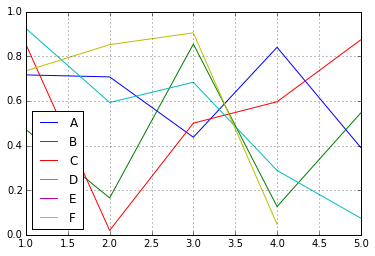

In [79]:
df.plot();

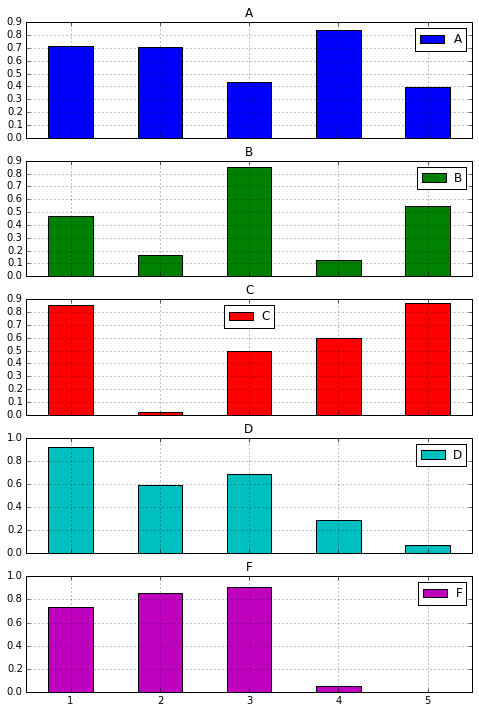

In [80]:
df.drop('E', axis=1).plot(figsize=(8,12), \
                          subplots=True, \
                          sharex=True, \
                          kind='bar', rot=0); 

In [81]:
import pandas as pd
from sklearn.datasets import load_iris
 
iris = load_iris()
 
iris = pd.DataFrame(iris.data, columns=iris.feature_names)

In [82]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


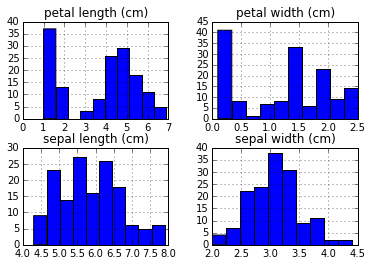

In [83]:
iris.hist(); 

In [84]:
HTML('<iframe src=http://pandas.pydata.org/pandas-docs/stable/visualization.html width=1000 height=350></iframe>')

### Input and Output in pandas

Pandas has very powerful IO methods, allowing to load csv, excel, tab-delimited files very easily. Pandas DataFrames can also be 
saved also in csv, excel files. 

Other supported file types are: 

* JSON (JavaScript Object Notation)
* HDF5 
* HTML (to e.g. read tables contained in HTML documents)
* SQL (Pandas can **query directly from SQL databases** thanks to [SQLAlchemy](http://www.sqlalchemy.org/))
* ...

In [86]:
SOI = pd.read_csv('../data/NIWA_SOI.csv')

In [87]:
SOI.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1877,-1.044600,-0.834198,-0.759131,-1.103454,0.349381,-1.901213,-1.002934,-1.044881,-1.839545,-1.745311,-1.453885,-1.541774
1,1878,-0.940401,-2.339884,-1.981073,-1.009742,0.189664,-0.448601,1.568691,1.216173,1.734780,1.002227,1.460825,1.744423
2,1879,1.404088,1.302904,1.257072,1.426758,0.189664,1.602146,2.147306,2.243925,1.858033,1.439335,0.905642,-0.774995
3,1880,1.195689,0.622917,1.379266,0.583354,1.227823,0.833116,0.154297,1.353207,0.748760,0.377786,0.628051,-0.391605
4,1881,-0.784101,-0.737057,-0.025966,0.021085,-0.449204,-0.619496,-0.552899,-1.387465,-1.469787,-2.557084,0.628051,0.868104


In [88]:
SOI = pd.read_csv('./data/NIWA_SOI.csv', index_col=0)

In [89]:
SOI.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1877,-1.044600,-0.834198,-0.759131,-1.103454,0.349381,-1.901213,-1.002934,-1.044881,-1.839545,-1.745311,-1.453885,-1.541774
1878,-0.940401,-2.339884,-1.981073,-1.009742,0.189664,-0.448601,1.568691,1.216173,1.734780,1.002227,1.460825,1.744423
1879,1.404088,1.302904,1.257072,1.426758,0.189664,1.602146,2.147306,2.243925,1.858033,1.439335,0.905642,-0.774995
1880,1.195689,0.622917,1.379266,0.583354,1.227823,0.833116,0.154297,1.353207,0.748760,0.377786,0.628051,-0.391605
1881,-0.784101,-0.737057,-0.025966,0.021085,-0.449204,-0.619496,-0.552899,-1.387465,-1.469787,-2.557084,0.628051,0.868104


In [90]:
SOI.ix[1950:2000].head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1950,0.570492,1.642897,1.745849,1.895316,0.748673,2.712966,2.083016,1.147657,0.625507,1.626667,1.183234,2.292122
1951,1.820886,0.817199,-0.392549,-0.166338,-0.688779,0.405877,-0.810062,-0.222680,-0.791898,-0.933539,-0.482315,-0.501145
1952,-0.992500,-0.979910,-0.209257,-1.009742,0.588956,0.662220,0.347169,-0.565264,-0.422140,0.065566,-0.204724,-1.541774
1953,0.257894,-0.785628,-0.881325,-0.072626,-3.244249,-0.363153,-0.102865,-2.004117,-1.408161,-0.121766,-0.343519,-0.610685
1954,0.674692,-0.542775,-0.331452,0.770778,0.429239,-0.277705,0.411460,0.942106,0.379002,0.065566,0.281061,1.196723


#### Stacking 

In [91]:
SOIs = SOI.stack()

In [92]:
SOIs.head()

Year     
1877  Jan   -1.044600
      Feb   -0.834198
      Mar   -0.759131
      Apr   -1.103454
      May    0.349381
dtype: float64

In [93]:
SOIs.index

MultiIndex(levels=[[1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, ...], [u'Jan', u'Feb', u'Mar', u'Apr', u'May', u'Jun', u'Jul', u'Aug', u'Sep', u'Oct', u'Nov', u'Dec']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 

In [94]:
from dateutil import parser

In [95]:
dateindex = [parser.parse("-".join(map(str, [x[0], x[1], 1]))) for x in SOIs.index]

In [96]:
SOIs.index=dateindex

In [97]:
SOIs.head()

1877-01-01   -1.044600
1877-02-01   -0.834198
1877-03-01   -0.759131
1877-04-01   -1.103454
1877-05-01    0.349381
dtype: float64

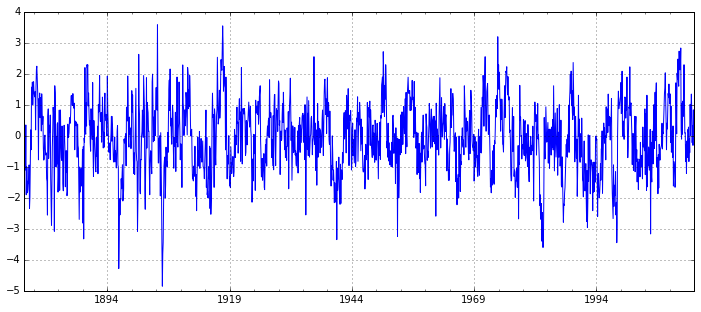

In [98]:
SOIs.plot(figsize=(12,5))

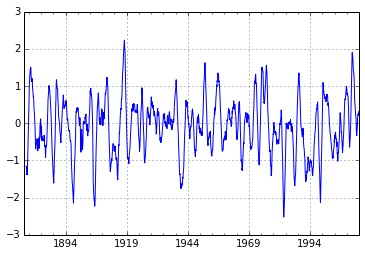

In [99]:
pd.rolling_mean(SOIs,12).plot()

##### Saving in csv, excel etc

In [100]:
SOIs = pd.DataFrame(SOIs)

In [106]:
SOIs.to_excel('./data/SOI_time_series.xlsx', header=False)

In [107]:
#!open ./data/SOI_time_series.xlsx

#### Reading Excel files

first example: an Excel file, containing one sheet, with an Excel `dates` column

In [ ]:
#!open ./data/ISO_datetime.xls

In [108]:
data = pd.read_excel('./data/ISO_datetime.xls', sheetname='Sheet1')

In [109]:
data.head()

,date,value
0,2014-01-02,0.786299
1,2014-01-03,0.354398
2,2014-01-04,0.747329
3,2014-01-05,0.461564
4,2014-01-06,0.626105


In [110]:
data.date

0   2014-01-02
1   2014-01-03
2   2014-01-04
3   2014-01-05
4   2014-01-06
5   2014-01-07
6   2014-01-08
7   2014-01-09
8   2014-01-10
9   2014-01-11
Name: date, dtype: datetime64[ns]

In [111]:
data = pd.read_excel('./data/ISO_datetime.xls', \
                     sheetname='Sheet1', index_col=0)

In [112]:
data.index

<class 'pandas.tseries.index.DatetimeIndex'>
[2014-01-02, ..., 2014-01-11]
Length: 10, Freq: None, Timezone: None

#### correctly parsing date(times) when date and time information are contained in different columns

In [34]:
!open ../../data/year_month_day.xlsx

In [32]:
ymd = pd.read_excel('../data/year_month_day.xlsx', sheetname='Sheet1')
ymd.head()

IOError: [Errno 2] No such file or directory: '../data/year_month_day.xlsx'

In [115]:
ymd = pd.read_excel('./data/year_month_day.xlsx', sheetname='Sheet1', \
                    parse_dates = {'date': [0, 1, 2]}, \
                    index_col='date')
ymd.head()

,value
date,
2014-01-02,0.786299
2014-01-03,0.354398
2014-01-04,0.747329
2014-01-05,0.461564
2014-01-06,0.626105


In [116]:
myd = pd.read_excel('./data/year_month_day.xlsx', sheetname='Sheet2'); myd.head()

,month,year,day,value
0,1,2014,2,0.478467
1,1,2014,3,0.833801
2,1,2014,4,0.837646
3,1,2014,5,0.453646
4,1,2014,6,0.260355


In [117]:
myd = pd.read_excel('./data/year_month_day.xlsx', sheetname='Sheet2',\
                    parse_dates = {'date': [1, 0, 2]}, \
                    index_col='date'); 
myd.head()

,value
date,
2014-01-02,0.478467
2014-01-03,0.833801
2014-01-04,0.837646
2014-01-05,0.453646
2014-01-06,0.260355


#### dealing with separators in text files

In [9]:
HTML('<iframe src=http://www.jamstec.go.jp/frcgc/research/d1/iod/DATA/emi.weekly.txt width=900 height=200></iframe>')

You can use [regular expressions](http://en.wikipedia.org/wiki/Regular_expression) to specify what delimiters to use. 

To know more about regular expressions and their use from Python via the [re](https://docs.python.org/2/library/re.html) package, read: [http://www.ucs.cam.ac.uk/docs/course-notes/unix-courses/PythonRE/files/PythonRE.pdf](http://www.ucs.cam.ac.uk/docs/course-notes/unix-courses/PythonRE/files/PythonRE.pdf)

In [22]:
data_weekly = pd.read_table('http://www.jamstec.go.jp/frcgc/research/d1/iod/DATA/emi.weekly.txt', \
                            header=None, sep=r'[:, \s*]', parse_dates={'date':[0,1,2]}, engine='python',\
                            index_col='date', usecols=[0,1,2,4])

In [23]:
data_weekly.head()

,4
date,
1981-11-08,-0.067576
1981-11-15,0.160920
1981-11-22,-0.013710
1981-11-29,0.478350
1981-12-06,0.094251


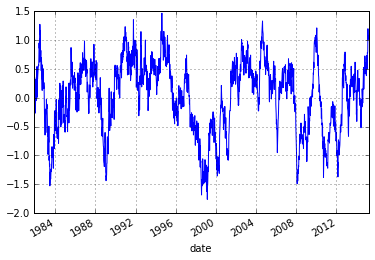

In [29]:
data_weekly.plot(legend=False);

### groupby operations in Pandas 

The **groupby** method is a very powerful method of pandas DataFrames, in a nutschell it allows you to

1. **split** your data according to unique values of a variable (or unique *combinations* of *N* variables)

2. **apply** some operation to the groups thus defined, either an *aggregation* or *transformation* method 

3. **combine** the results into a DataFrame

This process is illustrated below, where the operation is here calculating the mean of the groups's values

A very nice explanation of the **groupby** method, with examples, is available from Pandas's documentation at:  

[http://pandas.pydata.org/pandas-docs/stable/groupby.html](http://pandas.pydata.org/pandas-docs/stable/groupby.html)

and a short tutorial on Wes McKinney's blog [here](http://wesmckinney.com/blog/?p=125)

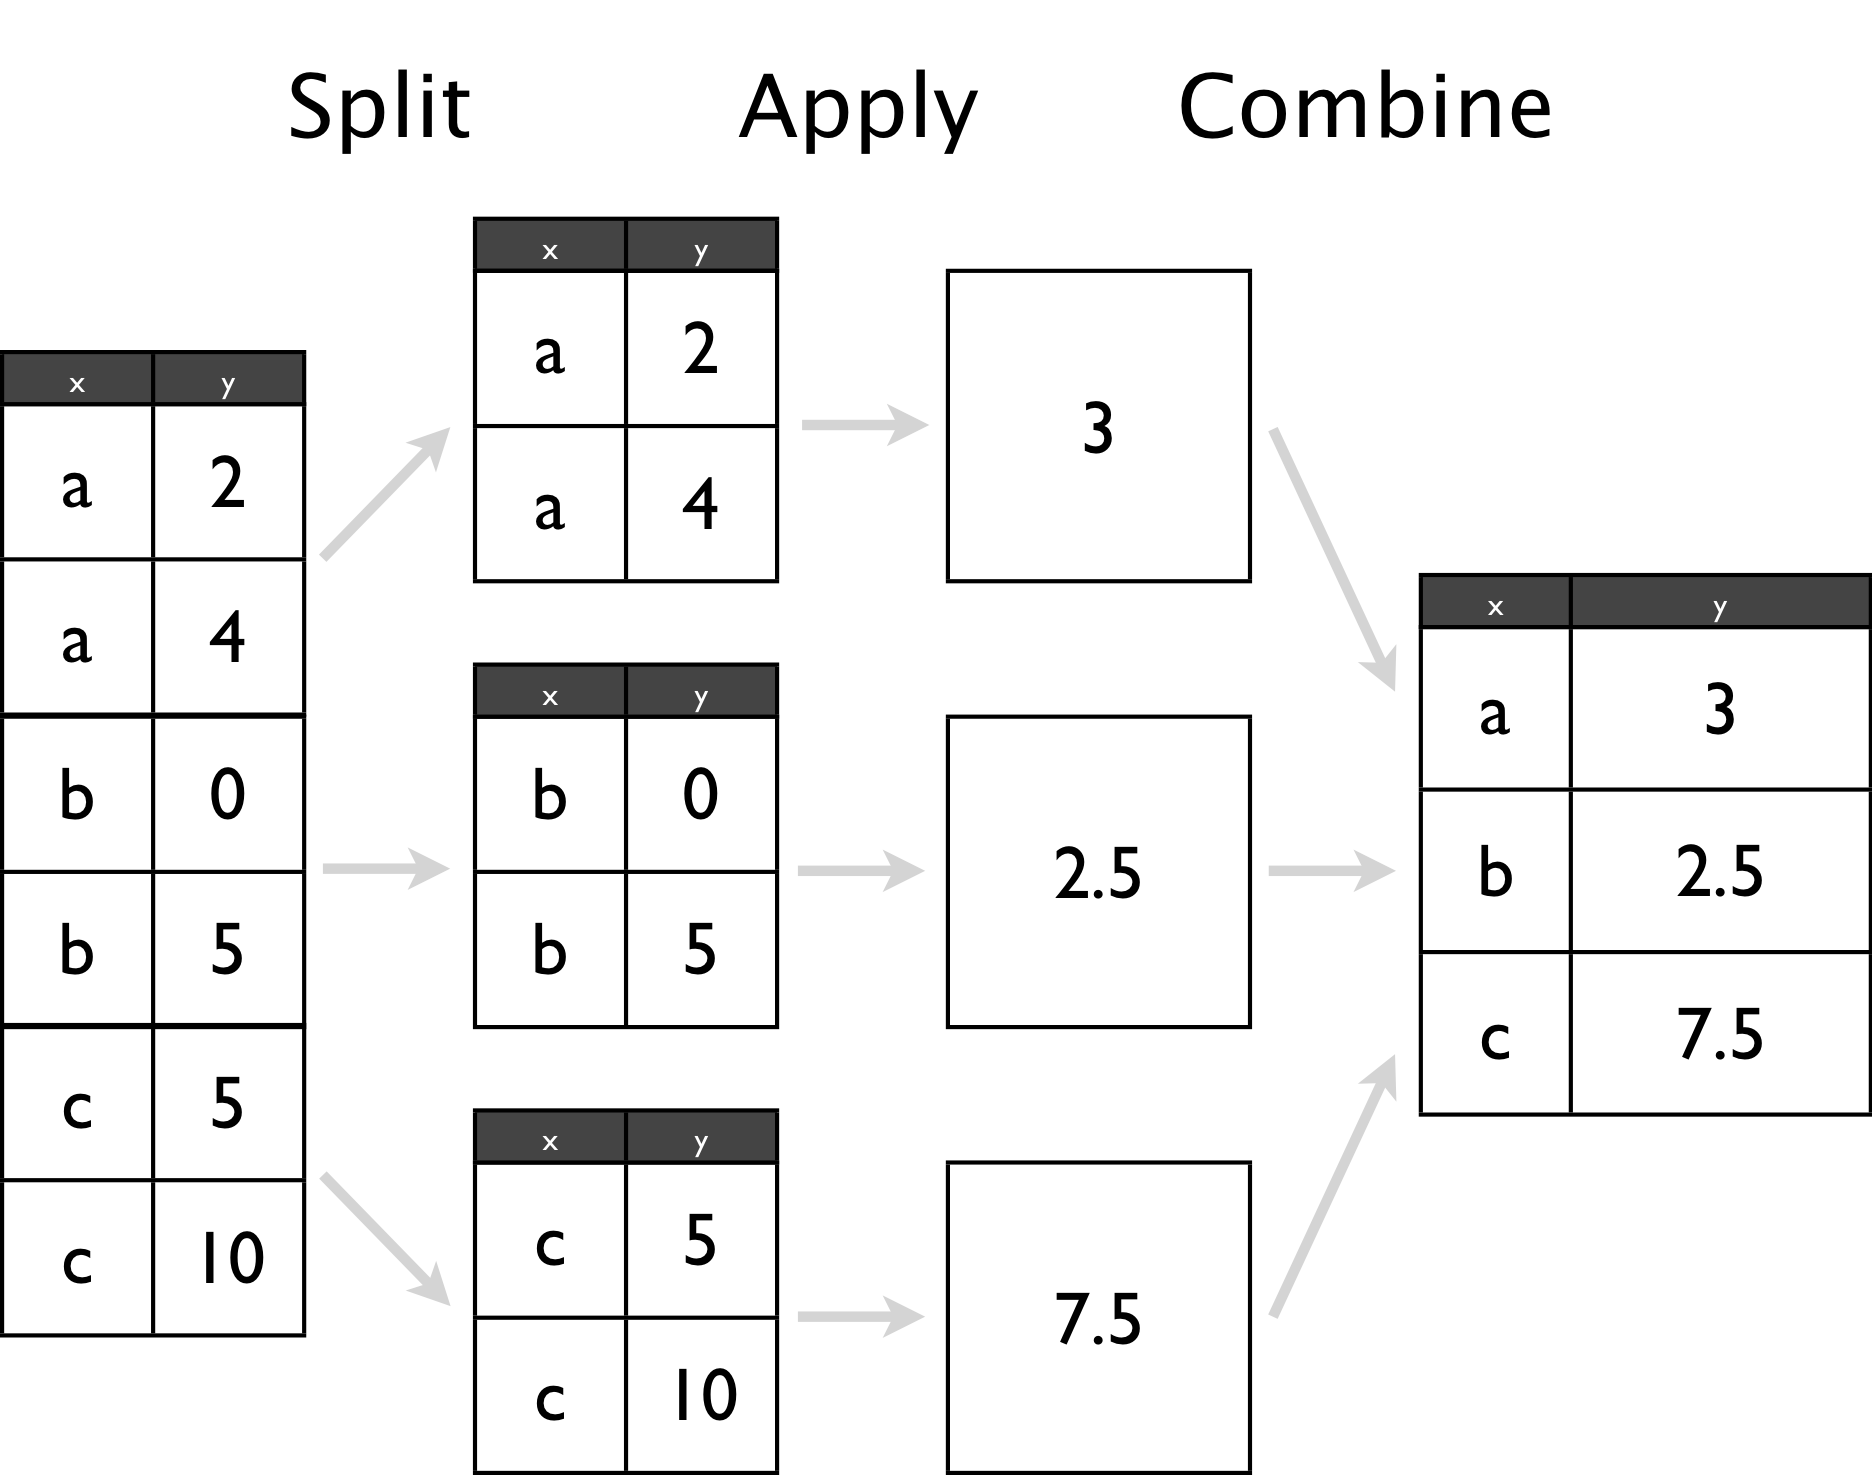

In [118]:
Image(filename='images/split-apply-combine.png', width=800)

In [119]:
url = "ftp://ftp.cpc.ncep.noaa.gov/wd52dg/data/indices/ersst3b.nino.mth.81-10.ascii"

In [ ]:
!wget -P ./data ftp://ftp.cpc.ncep.noaa.gov/wd52dg/data/indices/ersst3b.nino.mth.81-10.ascii

In [122]:
data = pd.read_table('./data/ersst3b.nino.mth.81-10.ascii', sep='\s+') #the '\s+' is a regular expression meaning any number of spaces

In [ ]:
# if the network confirguration allows it, you can read directly off the URL (ftp):

#data = pd.read_table(url, sep='\s+')

In [123]:
data.tail()

,YR,MON,NINO1+2,ANOM,NINO3,ANOM.1,NINO4,ANOM.2,NINO3.4,ANOM.3
763,2013,8,19.99,-1.11,24.56,-0.64,28.64,-0.08,26.56,-0.37
764,2013,9,20.04,-0.84,24.54,-0.49,28.68,-0.03,26.55,-0.27
765,2013,10,20.44,-0.76,24.87,-0.20,28.74,0.02,26.65,-0.14
766,2013,11,21.49,-0.33,24.93,-0.21,28.54,-0.11,26.54,-0.19
767,2013,12,22.58,-0.43,25.03,-0.28,28.32,-0.21,26.26,-0.43


I only keep the raw - monthly - values of NINO 3.4 

In [124]:
nino = data[['YR','MON','NINO3.4']]

In [125]:
nino.tail()

,YR,MON,NINO3.4
763,2013,8,26.56
764,2013,9,26.55
765,2013,10,26.65
766,2013,11,26.54
767,2013,12,26.26


Now I want to calculate a climatology (over the whole period available)

I first group by UNIQUE values of the variable months, I should get 12 groups

In [126]:
groups = nino.groupby('MON')

In [127]:
for month, group in groups:
    print month
    print group.head()

1
      YR  MON  NINO3.4
0   1950    1    24.83
12  1951    1    25.46
24  1952    1    26.85
36  1953    1    26.85
48  1954    1    27.03
2
      YR  MON  NINO3.4
1   1950    2    25.20
13  1951    2    25.78
25  1952    2    26.79
37  1953    2    27.19
49  1954    2    27.22
3
      YR  MON  NINO3.4
2   1950    3    26.03
14  1951    3    26.72
26  1952    3    27.32
38  1953    3    27.68
50  1954    3    27.21
4
      YR  MON  NINO3.4
3   1950    4    26.36
15  1951    4    27.24
27  1952    4    27.88
39  1953    4    28.19
51  1954    4    26.87
5
      YR  MON  NINO3.4
4   1950    5    26.19
16  1951    5    27.68
28  1952    5    27.99
40  1953    5    28.29
52  1954    5    27.06
6
      YR  MON  NINO3.4
5   1950    6    26.52
17  1951    6    27.46
29  1952    6    27.33
41  1953    6    28.02
53  1954    6    26.93
7
      YR  MON  NINO3.4
6   1950    7    26.42
18  1951    7    27.72
30  1952    7    26.72
42  1953    7    27.52
54  1954    7    26.37
8
      YR  MON  NIN

In [128]:
climatology = groups.mean()

Same as 

    climatology = groups.aggregate(np.mean)
    
    

In [129]:
climatology['NINO3.4'].head(12)

MON
1      26.491719
2      26.686719
3      27.189531
4      27.622969
5      27.733125
6      27.540469
7      27.149531
8      26.764531
9      26.667344
10     26.632656
11     26.593750
12     26.530000
Name: NINO3.4, dtype: float64

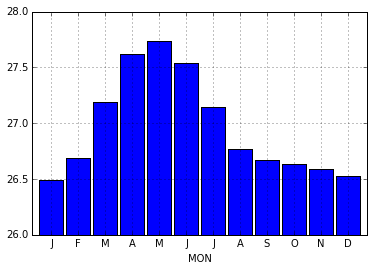

In [130]:
f, ax = plt.subplots()

climatology['NINO3.4'].plot(ax=ax, kind='bar',ylim=[26,28], rot=0, width=0.9)

ax.set_xticklabels(list('JFMAMJJASOND'));

f.savefig('./climatology.pdf')

Now suppose we want to apply a function that doesnt **aggregate** the values in the groups (such as *sum*, or *mean*) but rather want to **apply a function** to those values ... 

An example would be calculating the standardized anomalies per month (to each value subtract the mean of the corresponding month, then divide by the standard-deviation)

In [131]:
def zscore(x): 
    z = (x - x.mean()) / x.std()
    return z

In [132]:
transformed = nino.groupby(nino.MON).apply(zscore)

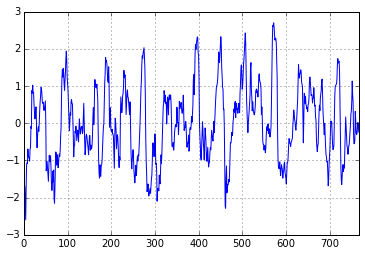

In [133]:
transformed['NINO3.4'].plot()

Now we want calculate (just) the anomalies WRT to the climatology, but with a ** *normal* established over 1980 - 2010**

In [134]:
nino.head()

,YR,MON,NINO3.4
0,1950,1,24.83
1,1950,2,25.20
2,1950,3,26.03
3,1950,4,26.36
4,1950,5,26.19


we can make use of the *query* method of Pandas DataFrames to select the climatological period

In [135]:
nino.query('YR >= 1981 & YR <= 2000').head()

,YR,MON,NINO3.4
372,1981,1,26.17
373,1981,2,26.13
374,1981,3,26.75
375,1981,4,27.32
376,1981,5,27.41


In [136]:
def demean(x): 
    z = x - x.query('YR >= 1981 & YR <= 2000').mean()
    return z

In [137]:
anoms = nino.groupby([nino.MON]).apply(demean)

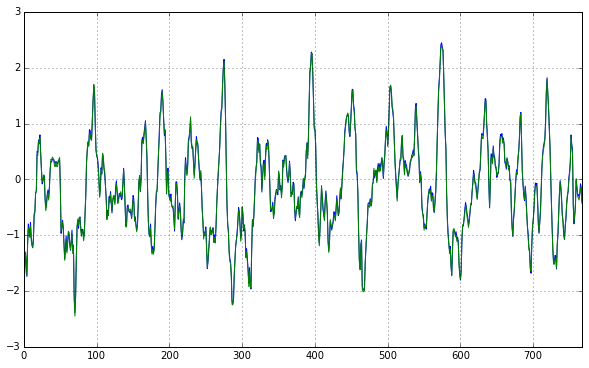

In [138]:
f, ax = plt.subplots(figsize=(10,6))
anoms['NINO3.4'].plot()
data['ANOM.3'].plot() # Should be the same

### Exercise

The file [Daily_clim_data_Auckland.csv](./data/Daily_clim_data_Auckland.csv) in the `data` directory contains 
daily values for rainfall, minimum and maximum temperatures for Auckland from 1972 to now.  

1. Read the data in a Pandas DataFrame, correctly setting up the index as a datetime object 
2. calculate monthly means for the temperature data, monthly totals for rainfall 
3. calculate and plot a climatology over the period 1981 - 2000 for all parameters 
4. calculate the anomalies WRT this climatology for all parameters 
5. plots the time-series of minimum and maximum temperature 
6. dig into the Scipy documentation to find how to calculate the linear trend over the period for the temperature data 
7. calculate and plot the trend 
8. Contact the [New Zealand Climate Science Coalition](http://www.nzclimatescience.org/)

### Some more data manipulation with Pandas

This is some real data provided by Dan Smale (NIWA Lauder). It is a summary file of daily QA/QC (data quality) diagnostics of raw GPS data collected at NIWA Lauder. The GPS data can be used to infer the amount of total column water vapour in the atmosphere (above Lauder).

Summary of data
/data/gruan/gnss_processing/data/netr9_laud/rinex_211/LAUD0010.13S:SUM 13  1  1 00:00 13  1  1 23:59 24.00  30  25298  23597  93  0.57  0.43  11799

+ 13  1  1 00:00 13  1  1 23:59: time period the QC/QA variables are calculated for.
+ 24 = number of hourly entries
+ 30 = dt
+ 25298  = #expt = number of data points expected
+ 23597  = #have = number of data points collected
+ 93  =% #have/#expt*100
+ 0.57 = mp1 = mean path 1
+ 0.43  = mp2 = mean path 2
+ 11799 =o/slps = number of time slips


In [30]:
data = pd.read_table('../data/teqc_SUM.dat', sep='\s*', header=None) ## the '\s+' is a regular expression

IOError: [Errno 2] No such file or directory: './data/teqc_SUM.dat'

In [ ]:
data.head()

In [ ]:
data = pd.read_table('./data/teqc_SUM.dat', header=None, sep='\s+', \
                     names=['path','year1','m1','d1','t1','year2','m2','d2','t2','nh','nd','c1','c2','c3','c4','c5','c6'])
                                    

In [ ]:
data.head()

We want the index (row wise) to properly represent datetime info 

In [ ]:
from datetime import datetime

In [31]:
data.index = [datetime(y,m,d) for y,m,d in zip(data.year1+2000,data.m1,data.d1)]  
# note that we are using list comprehension

NameError: name 'data' is not defined

In [ ]:
data.head()

In [ ]:
data.pop('path') # we pop the 'path' variable, ve careful it operates in place

In [ ]:
data.head()

Sort the dataframe according to the index values (rowwise)  

Note that for plotting purposes, you don't even have to do that, pandas + matplotlib understand that the dates need to be in chronological order  

In [ ]:
data2 = data.sort()

In [ ]:
data2.head()

In [ ]:
data['c3'].plot(rot=90)

In [ ]:
plt.plot(data2.c3.values)

In [ ]:
data.columns

In [ ]:
data2 = data[data.columns[-6:]] 
# same as data2 = data[['c1','c2','c3','c4','c5','c6']] or data2 = data.ix[:,10::]

In [ ]:
data2.head()

In [ ]:
data2.plot(subplots=True, sharex=True, color='b', title='teqc_SUM', figsize=(14,13), rot=90)
plt.savefig('teqc_SUM.pdf')